## Load Dataset

In [193]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

test = pd.read_csv('./sales_ads_test.csv', delimiter=',')
train_ads = pd.read_csv('./sales_ads_train.csv', delimiter=',')
train_mostlyai = pd.read_csv('./synthetic_training_data_mostlyai_pl.csv', delimiter=',')
train_sdv = pd.read_csv('./synthetic_training_data_sdv_pl.csv', delimiter=',')

# train_all = pd.concat([train_ads, train_mostlyai, train_sdv])
train_all = pd.concat([train_ads])
train_all = train_all.drop(columns=['ID'])

train_all_shape_at_start = train_all.shape
test_shape_at_start = test.shape

print(f"sales_ads_test.csv shape: {test_shape_at_start}")
print(f"sales_ads_train.csv shape: {train_ads.shape}")
print(f"synthetic_training_data_mostlyai_pl.csv shape: {train_mostlyai.shape}")
print(f"synthetic_training_data_sdv_pl.csv shape: {train_sdv.shape}")

print(f"train_all shape: {train_all_shape_at_start}")

pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
display(train_all.head())

sales_ads_test.csv shape: (72907, 24)
sales_ads_train.csv shape: (135397, 25)
synthetic_training_data_mostlyai_pl.csv shape: (250000, 25)
synthetic_training_data_sdv_pl.csv shape: (1000000, 25)
train_all shape: (135397, 24)


,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expr...,NaN,"2,005.00","213,000.00",170.00,"1,998.00",Gasoline,232.00,Front wheels,Manual,minivan,5.00,blue,NaN,NaN,NaN,28/04/2021,SŁONECZNA 1 - 99...,"['ABS', 'Electri..."
1,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),"2,010.00","117,089.00",110.00,"1,598.00",Gasoline,159.00,Front wheels,Manual,station_wagon,5.00,silver,NaN,NaN,16/06/2010,04/05/2021,ul. Wiosenna 8 -...,"['ABS', 'Electri..."
2,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ...,C (2011-2019),"2,015.00","115,600.00",136.00,"1,598.00",NaN,NaN,NaN,Manual,minivan,5.00,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliń...","['ABS', 'Electri..."
3,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silv...,Mk2 (2004-2011),"2,007.00","218,000.00",90.00,"1,560.00",Diesel,118.00,Front wheels,Manual,compact,5.00,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorski...","['ABS', 'Electri..."
4,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),"2,013.00",NaN,NaN,"1,798.00",Gasoline,152.00,Front wheels,Manual,NaN,4.00,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnic...","['ABS', 'Electri..."


## Analyze and fix data


In [194]:

def show_info(df):
    pd.set_option('display.max_colwidth', None)
    analysis_results = []

    for column in df.columns:
        col_data = {}
        col_data['Column Name'] = column
        col_data['Type'] = str(df[column].dtype)

        missing_count = df[column].isnull().sum()
        col_data['Missing Values'] = missing_count
        col_data['Missing Percentage'] = (missing_count / len(df)) * 100

        unique_count = df[column].nunique()
        col_data['Unique Values'] = unique_count

        analysis_results.append(col_data)

    return pd.DataFrame(analysis_results)

print("test dataframe info:")
display(show_info(test))
print("train dataframe info:")
display(show_info(train_all))


test dataframe info:


,Column Name,Type,Missing Values,Missing Percentage,Unique Values
0,ID,int64,0,0.00,72907
1,Waluta,object,0,0.00,2
2,Stan,object,0,0.00,2
3,Marka_pojazdu,object,0,0.00,101
4,Model_pojazdu,object,0,0.00,998
5,Wersja_pojazdu,object,24513,33.62,12362
6,Generacja_pojazdu,object,21173,29.04,529
7,Rok_produkcji,int64,0,0.00,85
8,Przebieg_km,float64,330,0.45,21575
9,Moc_KM,float64,229,0.31,501


train dataframe info:


,Column Name,Type,Missing Values,Missing Percentage,Unique Values
0,Cena,int64,0,0.00,11039
1,Waluta,object,3376,2.49,2
2,Stan,object,3322,2.45,2
3,Marka_pojazdu,object,3351,2.47,102
4,Model_pojazdu,object,3309,2.44,1139
5,Wersja_pojazdu,object,48061,35.50,16014
6,Generacja_pojazdu,object,41660,30.77,558
7,Rok_produkcji,float64,3407,2.52,89
8,Przebieg_km,float64,4003,2.96,35543
9,Moc_KM,float64,3733,2.76,544


Brakuje ponad 50% wartości w kolumnach:
 <strong>Emisja_CO2, Kraj_pochodzenia, Data_pierwszej_rejestracji</strong>
Więc zostają one usunięte

Data_publikacji_oferty oraz Lokalizacja_oferty nie niesie za sobą żądnej wartości więc tez zostanie usunięta

In [195]:
columns_to_drop = ['Emisja_CO2', 'Kraj_pochodzenia', 'Data_pierwszej_rejestracji', 'Data_publikacji_oferty', 'Lokalizacja_oferty']

test = test.drop(columns=columns_to_drop)
train_all = train_all.drop(columns=columns_to_drop)

#### Cena

Rozkład ceny jest mocno przesunięty w prawą stronę więc można zastosować tranformację logarytmiczną

0 missing values in "Cena"
type of Cena: int64
count     135,397.00
mean       63,069.38
std        88,077.48
min           585.00
25%        17,800.00
50%        35,800.00
75%        75,990.00
max     6,999,000.00
Name: Cena, dtype: float64


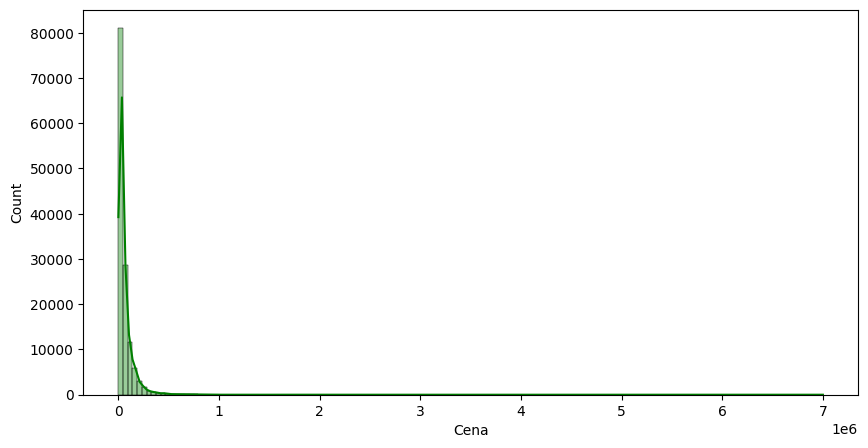

In [196]:

# train_all['Cena'] = np.log(train_all['Cena'])

missing_values = train_all['Cena'].isnull().sum()
print(f'{missing_values} missing values in "Cena"')
print(f'type of Cena: {train_all['Cena'].dtype}')

pd.set_option('display.float_format', '{:,.2f}'.format)
print(train_all['Cena'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(train_all['Cena'], color='g', bins=150, alpha=0.4, kde=True)

plt.show()

#### Wartości numeryczne

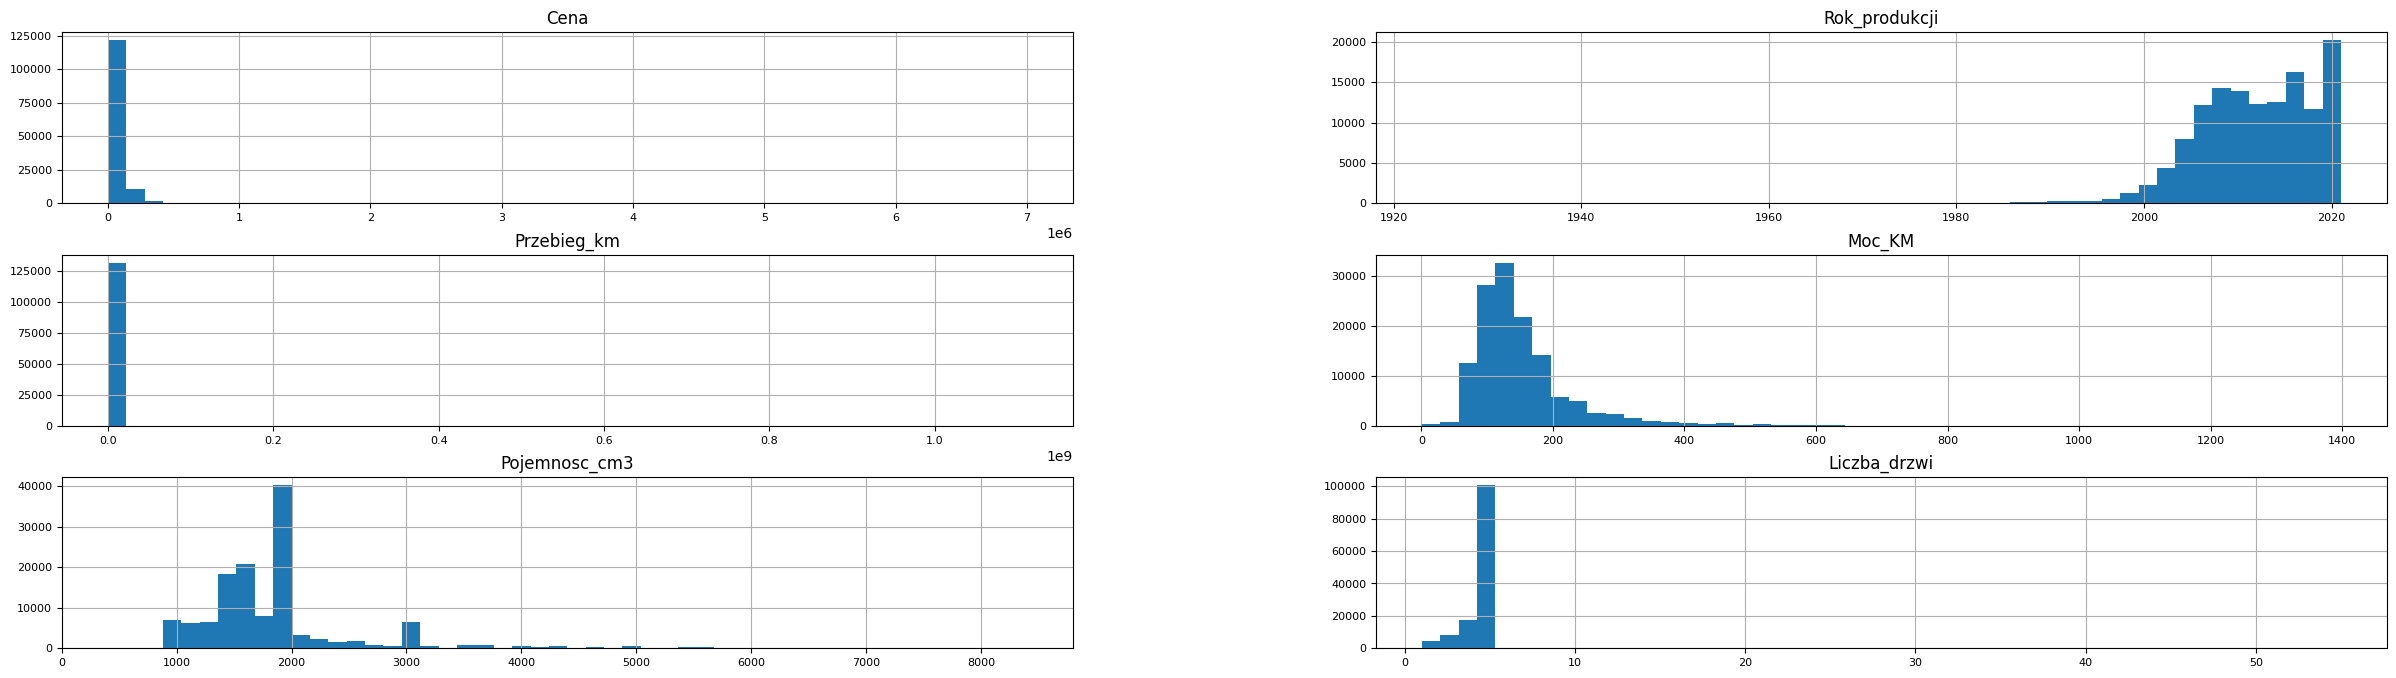

In [197]:
df_num = train_all.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(30, 8), bins=50, xlabelsize=8, ylabelsize=8);

#### Wartości kategoryczne

In [198]:
def plot_value_counts(train_col, test_col, title=None, figsize=(14, 6)):
    """
    Tworzy dwa oddzielne wykresy obok siebie pokazujące liczebność unikalnych wartości
    w zbiorze treningowym i testowym.
    
    Parametry:
    train_col (Series): Kolumna ze zbioru treningowego
    test_col (Series): Kolumna ze zbioru testowego
    title (str): Główny tytuł wykresu (opcjonalny)
    figsize (tuple): Rozmiar wykresu (opcjonalny)
    """
    import matplotlib.pyplot as plt
    
    # Przygotowanie danych
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Wykres dla zbioru treningowego
    train_counts = train_col.value_counts(dropna=False)
    train_counts.plot(kind='bar', ax=ax1, color='blue')
    ax1.set_title('Zbiór treningowy')
    ax1.set_xlabel('Wartość')
    ax1.set_ylabel('Liczba wystąpień')
    
    # Dodawanie wartości nad słupkami dla zbioru treningowego
    for i, v in enumerate(train_counts):
        ax1.text(i, v + 0.1, str(int(v)), ha='center')
    
    # Wykres dla zbioru testowego
    test_counts = test_col.value_counts(dropna=False)
    test_counts.plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Zbiór testowy')
    ax2.set_xlabel('Wartość')
    ax2.set_ylabel('Liczba wystąpień')
    
    # Dodawanie wartości nad słupkami dla zbioru testowego
    for i, v in enumerate(test_counts):
        ax2.text(i, v + 0.1, str(int(v)), ha='center')
    
    # Dodawanie głównego tytułu
    if title is None:
        title = f'Liczba wystąpień wartości w zbiorach treningowych i testowych'
    fig.suptitle(title, fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Dostosowanie, aby zmieścić główny tytuł
    plt.show()
    
    return fig, (ax1, ax2)


Waluta:
 count     132021
unique         2
top          PLN
freq      131856
Name: Waluta, dtype: object


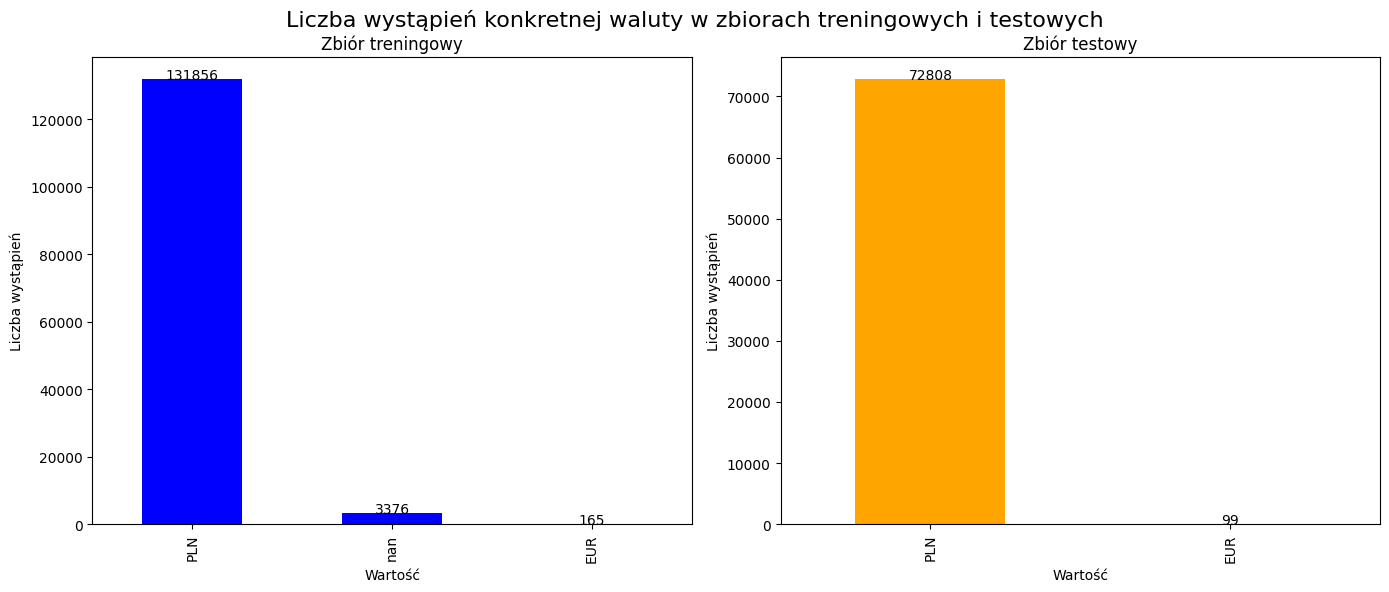

Stan:
 count     132075
unique         2
top         Used
freq      115824
Name: Stan, dtype: object


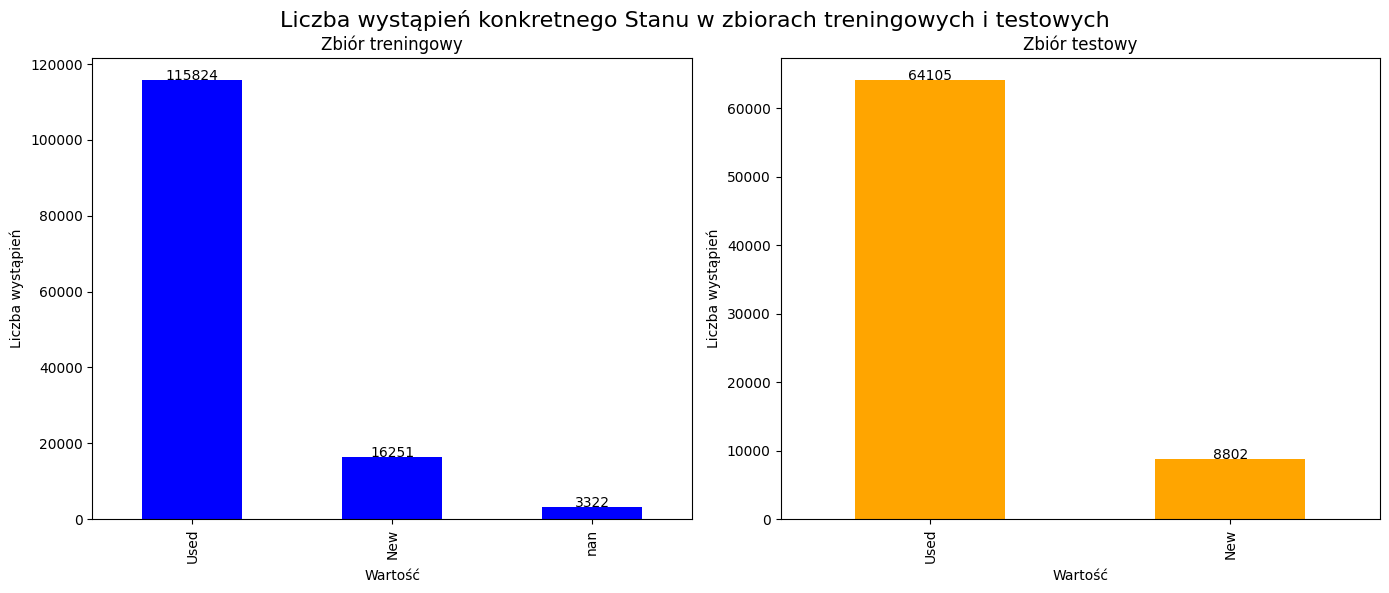

Rodzaj_paliwa:
 count       131987
unique           8
top       Gasoline
freq         63003
Name: Rodzaj_paliwa, dtype: object


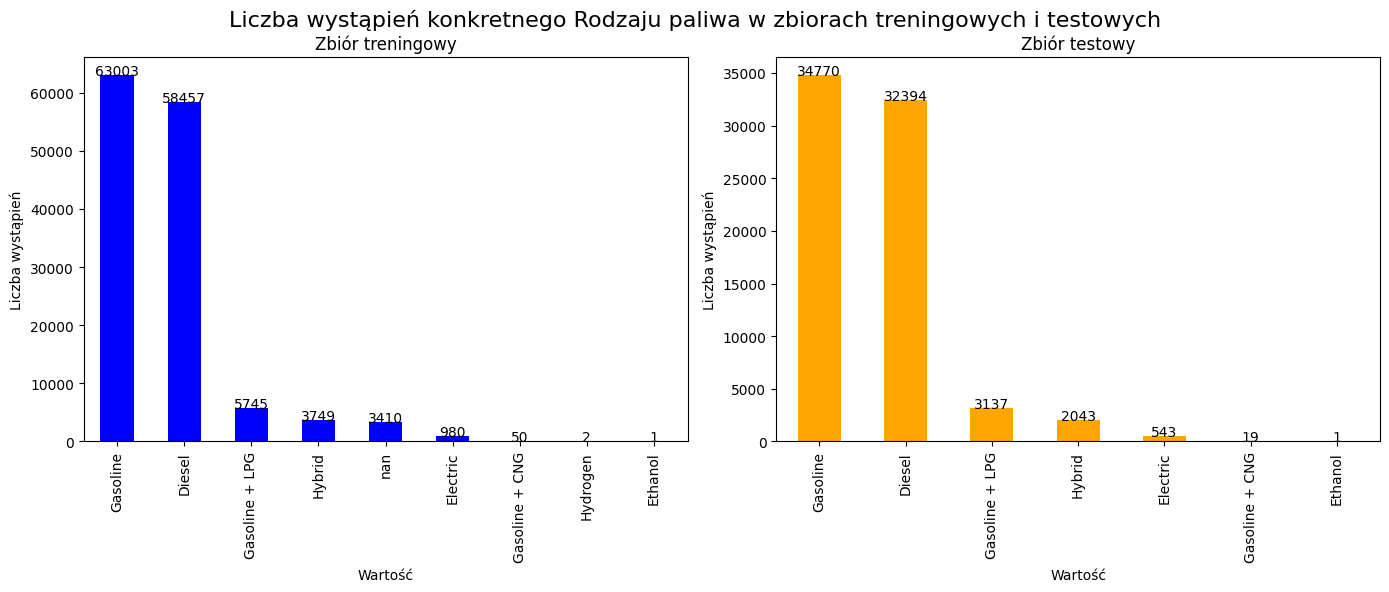

Naped:
 count           122343
unique               5
top       Front wheels
freq             88699
Name: Naped, dtype: object


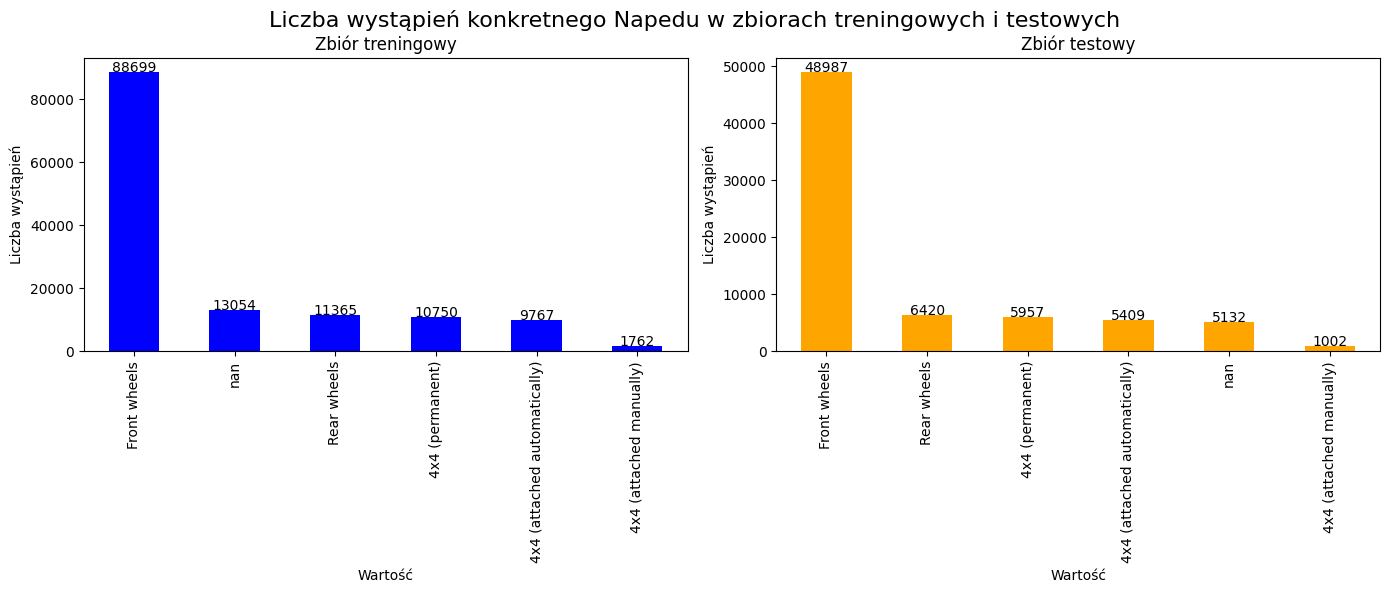

Skrzynia_biegow:
 count     131622
unique         2
top       Manual
freq       84229
Name: Skrzynia_biegow, dtype: object


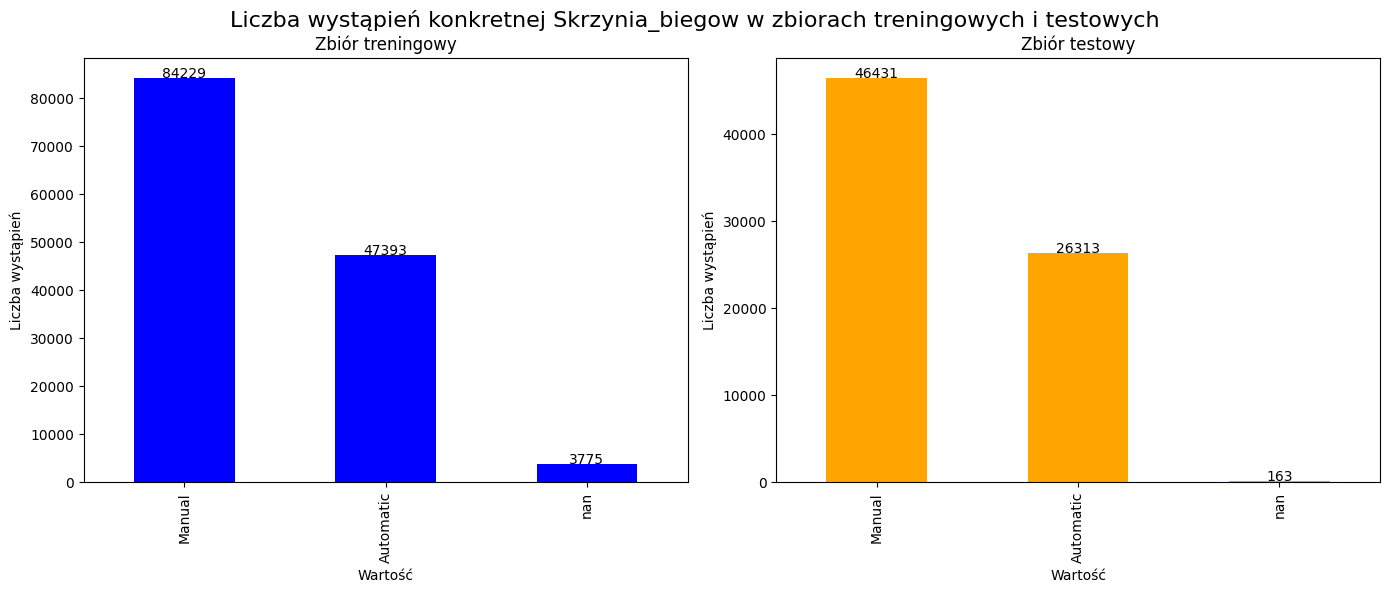

Typ_nadwozia:
 count     132038
unique         9
top          SUV
freq       26419
Name: Typ_nadwozia, dtype: object


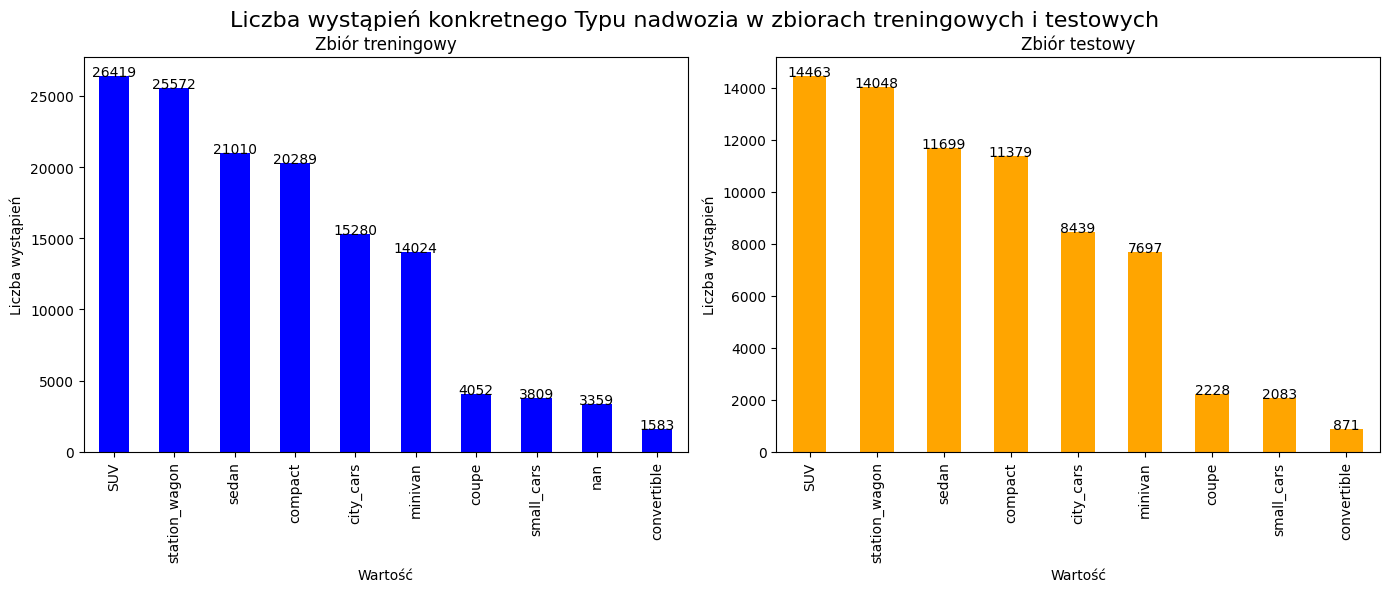

Kolor:
 count     131934
unique        14
top        black
freq       31680
Name: Kolor, dtype: object


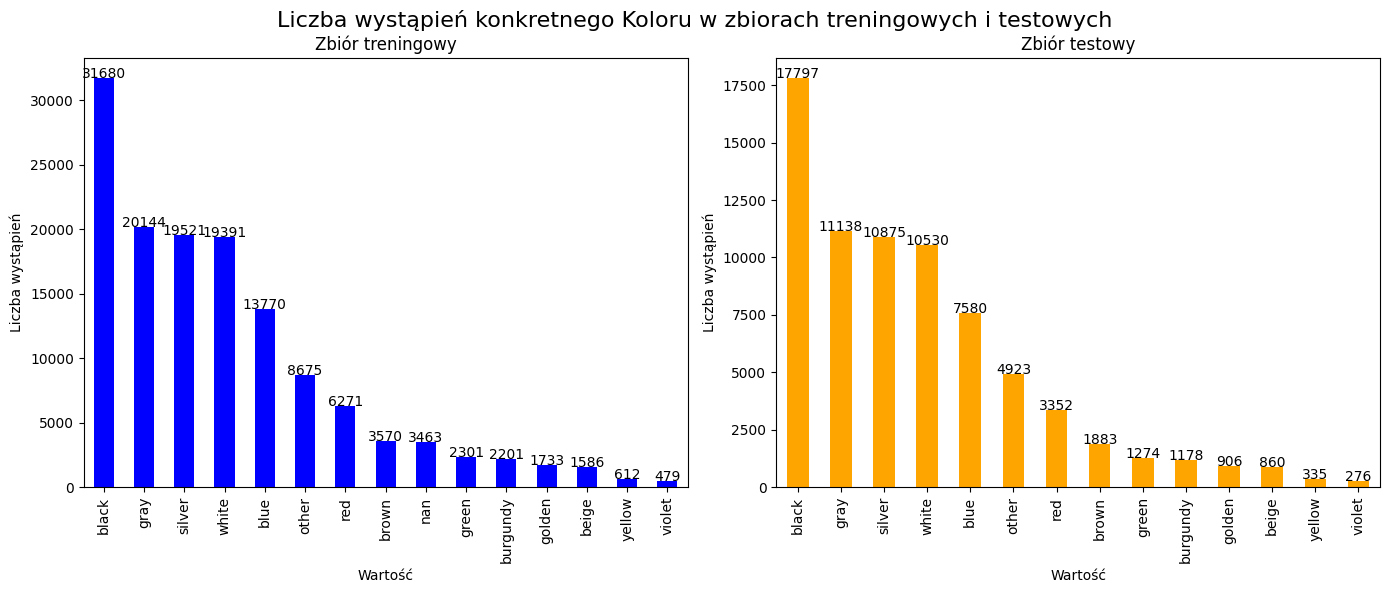

(<Figure size 1400x600 with 2 Axes>,
 (<Axes: title={'center': 'Zbiór treningowy'}, xlabel='Wartość', ylabel='Liczba wystąpień'>,
  <Axes: title={'center': 'Zbiór testowy'}, xlabel='Wartość', ylabel='Liczba wystąpień'>))

In [199]:

pd.set_option('display.float_format', '{:,.2f}'.format)

print("Waluta:\n", train_all['Waluta'].describe())
plot_value_counts(train_all['Waluta'], test['Waluta'], 
    title='Liczba wystąpień konkretnej waluty w zbiorach treningowych i testowych')

print("Stan:\n", train_all['Stan'].describe())
plot_value_counts(train_all['Stan'], test['Stan'], 
    title='Liczba wystąpień konkretnego Stanu w zbiorach treningowych i testowych')

print("Rodzaj_paliwa:\n", train_all['Rodzaj_paliwa'].describe())
plot_value_counts(train_all['Rodzaj_paliwa'], test['Rodzaj_paliwa'], 
    title='Liczba wystąpień konkretnego Rodzaju paliwa w zbiorach treningowych i testowych')

print("Naped:\n", train_all['Naped'].describe())
plot_value_counts(train_all['Naped'], test['Naped'], 
    title='Liczba wystąpień konkretnego Napedu w zbiorach treningowych i testowych')

print("Skrzynia_biegow:\n", train_all['Skrzynia_biegow'].describe())
plot_value_counts(train_all['Skrzynia_biegow'], test['Skrzynia_biegow'], 
    title='Liczba wystąpień konkretnej Skrzynia_biegow w zbiorach treningowych i testowych')

print("Typ_nadwozia:\n", train_all['Typ_nadwozia'].describe())
plot_value_counts(train_all['Typ_nadwozia'], test['Typ_nadwozia'], 
    title='Liczba wystąpień konkretnego Typu nadwozia w zbiorach treningowych i testowych')

print("Kolor:\n", train_all['Kolor'].describe())
plot_value_counts(train_all['Kolor'], test['Kolor'], 
    title='Liczba wystąpień konkretnego Koloru w zbiorach treningowych i testowych')

- W rodzaju paliwa pojawiają sie: RARE i Hydrogen, nie są one urzywane w zbiorze testowym i są dość żadkie więc są do usunięcia
 

In [200]:
train_all = train_all[~train_all['Rodzaj_paliwa'].isin(['_RARE_', 'Hydrogen'])]

- usuwamy wiersze gdzie mamy puste pawrtości w małej liczebności a w zbiorze testowym nie występuje brak wartości w tych kolumnach

In [201]:
train_all = train_all[train_all['Waluta'].notna()]
train_all = train_all[train_all['Stan'].notna()]
train_all = train_all[train_all['Kolor'].notna()]
train_all = train_all[train_all['Typ_nadwozia'].notna()]
train_all = train_all[train_all['Rodzaj_paliwa'].notna()]
train_all = train_all[train_all['Rok_produkcji'].notna()]

- zamieniamy brakujące wartości kategoryczne na "not_specified"

In [202]:
for column in train_all.columns:
    if train_all[column].dtype == 'object': 
        train_all[column] = train_all[column].fillna("Not_Specified")

for column in test.columns:
    if test[column].dtype == 'object': 
        test[column] = test[column].fillna("Not_Specified")

- wypeniamy brakujące wartości numeryczne medianą

In [203]:
columns_to_fill = ['Pojemnosc_cm3', 'Moc_KM', 'Przebieg_km', 'Liczba_drzwi']

test_medians = test[columns_to_fill].median()
train_all_medians = train_all[columns_to_fill].median()

for col in columns_to_fill:
    median_value = (test_medians[col] + train_all_medians[col]) / 2
    test[col].fillna(median_value, inplace=True)
    train_all[col].fillna(median_value, inplace=True)


C:\Users\Karol\AppData\Local\Temp\ipykernel_11376\926467437.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(median_value, inplace=True)
C:\Users\Karol\AppData\Local\Temp\ipykernel_11376\926467437.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

#### Marka model wersja i generacja pojazdu


###### Próba wypełniania marki i modelu na podstawie wersji oraz marki na postawie modelu nie przyniosła większego efektu, w ten sposóbn wypełniono jedynioe 219 warości w datasecie testowym i treningowym, kod został usunięty ponieważ był zbyt długi

In [204]:

marka_pojazdu_train_uniq = train_all['Marka_pojazdu'].unique()
marka_pojazdu_test_uniq = test['Marka_pojazdu'].unique()

# print(f"Unikalne Marki samochodów w danych treningowych({len(marka_pojazdu_train_uniq)}): {marka_pojazdu_train_uniq}")
# print(f"Unikalne Marki samochodów w danych testowych({len(marka_pojazdu_test_uniq)}): {marka_pojazdu_test_uniq}")

not_in_test = []
for brand in marka_pojazdu_train_uniq:
    if brand not in marka_pojazdu_test_uniq:
        not_in_test.append(brand)

not_in_train = []
for brand in marka_pojazdu_test_uniq:
    if brand not in marka_pojazdu_train_uniq:
        not_in_train.append(brand)

print(f"\nMarki któych nie ma w zbiorze testowym a są w treningowym({len(not_in_test)}): {not_in_test}")
print(f"\nMarki któych nie ma w zbiorze treningowym a są w testowym({len(not_in_train)}): {not_in_train}")



Marki któych nie ma w zbiorze testowym a są w treningowym(8): ['Not_Specified', 'DKW', 'FAW', 'Tavria', 'Vauxhall', 'Grecav', 'Vanderhall', 'Saturn']

Marki któych nie ma w zbiorze treningowym a są w testowym(6): ['MAN', 'NSU', 'Maybach', 'Santana', 'Scion', 'Talbot']


- jeśli jakiejś marki nie ma w zbiorze testowym to można ją usunąć ze zbioru treningowego

In [205]:
train_all = train_all[~train_all['Marka_pojazdu'].isin([
    'DKW', 'FAW', 'Tavria', 'Vauxhall', 'Grecav', 'Vanderhall', 'Saturn', '_RARE_', 'Other'])]

usuwanie wszystkich wierszy gdzie występuje _RARE_, jest to wartość dodana tylko i wyłącznie w celu utrudnienia zadania

In [206]:
rows_before = len(train_all)
train_all = train_all[~train_all.isin(['_RARE_']).any(axis=1)]
rows_after = len(train_all)

deleted_rows = rows_before - rows_after

print(f"\nLiczba usuniętych wierszy: {deleted_rows}")
train_all.shape


Liczba usuniętych wierszy: 0


(116282, 19)

sprawdanie spójności danych w marce i modelu

In [207]:
import re
import unicodedata

def standardize_text(df, column):
    
    df_copy = df.copy()
    def clean_text(text):
        if pd.isna(text):
            return text
        
        text = str(text)
        text = text.lower()
        # Normalize non-ASCII characters (e.g., ś -> s, ć -> c)
        # NFD decomposes characters, and we keep only ASCII ones
        text = unicodedata.normalize('NFD', text)
        text = ''.join([c for c in text if not unicodedata.combining(c)])
        
        # Remove special characters, keep only letters, numbers and spaces
        text = re.sub(r'[^a-z0-9\s\.+]', '', text)
        
        # Replace multiple spaces with a single space
        text = re.sub(r'\s+', ' ', text)
        
        text = text.strip()
        
        return text
    
    df_copy[column] = df_copy[column].apply(clean_text)
    
    return df_copy

Mały test funkcji

In [208]:
data = {
    'Marka_pojazdu': ['Ford', 'BMW+', '&Audi.', '2.0 BlueHDi GT S&S EAT8', 'Peugeot', 'Renault+', 'Citroën', 'Mercedes-Benz'],
    'Model_pojazdu': ['Focus', 'X5+', 'A4.', 'Octavia', '308+', 'Clio+', 'C4', 'E-Class']
}
sample_df = pd.DataFrame(data)

sample_df = standardize_text(sample_df, 'Marka_pojazdu')
sample_df

,Marka_pojazdu,Model_pojazdu
0,ford,Focus
1,bmw+,X5+
2,audi.,A4.
3,2.0 bluehdi gt ss eat8,Octavia
4,peugeot,308+
5,renault+,Clio+
6,citroen,C4
7,mercedesbenz,E-Class


In [209]:
print("Normalizacja dla zbioru treningowego:")

unique_brands_before = len(train_all['Marka_pojazdu'].unique())
train_all = standardize_text(train_all, 'Marka_pojazdu')
unique_brands_after = len(train_all['Marka_pojazdu'].unique())
print(f"Unikatowe marki przed normalizacją: {unique_brands_before}, po normalizacji: {unique_brands_after}")

unique_model_before = len(train_all['Model_pojazdu'].unique())
train_all = standardize_text(train_all, 'Model_pojazdu')
unique_model_after = len(train_all['Model_pojazdu'].unique())
print(f"Unikatowe modele przed normalizacją: {unique_model_before}, po normalizacji: {unique_model_after}")

unique_versions_before = len(train_all['Wersja_pojazdu'].unique())
train_all = standardize_text(train_all, 'Wersja_pojazdu')
unique_versions_after = len(train_all['Wersja_pojazdu'].unique())
print(f"Unikatowe wersje przed normalizacją: {unique_versions_before}, po normalizacji: {unique_versions_after}")

unique_generations_before = len(train_all['Generacja_pojazdu'].unique())
train_all = standardize_text(train_all, 'Generacja_pojazdu')
unique_generations_after = len(train_all['Generacja_pojazdu'].unique())
print(f"Unikatowe generacje przed normalizacją: {unique_generations_before}, po normalizacji: {unique_generations_after}")


print("Normalizacja dla zbioru testowego:")
unique_brands_before = len(test['Marka_pojazdu'].unique())
test = standardize_text(test, 'Marka_pojazdu')
unique_brands_after = len(test['Marka_pojazdu'].unique())
print(f"Unikatowe marki przed normalizacją: {unique_brands_before}, po normalizacji: {unique_brands_after}")

unique_model_before = len(test['Model_pojazdu'].unique())
test = standardize_text(test, 'Model_pojazdu')
unique_model_after = len(test['Model_pojazdu'].unique())
print(f"Unikatowe modele przed normalizacją: {unique_model_before}, po normalizacji: {unique_model_after}")

unique_versions_before = len(test['Wersja_pojazdu'].unique())
test = standardize_text(test, 'Wersja_pojazdu')
unique_versions_after = len(test['Wersja_pojazdu'].unique())
print(f"Unikatowe wersje przed normalizacją: {unique_versions_before}, po normalizacji: {unique_versions_after}")

unique_generations_before = len(test['Generacja_pojazdu'].unique())
test = standardize_text(test, 'Generacja_pojazdu')
unique_generations_after = len(test['Generacja_pojazdu'].unique())
print(f"Unikatowe generacje przed normalizacją: {unique_generations_before}, po normalizacji: {unique_generations_after}")

Normalizacja dla zbioru treningowego:
Unikatowe marki przed normalizacją: 96, po normalizacji: 96
Unikatowe modele przed normalizacją: 1110, po normalizacji: 1109
Unikatowe wersje przed normalizacją: 15033, po normalizacji: 14693
Unikatowe generacje przed normalizacją: 552, po normalizacji: 548
Normalizacja dla zbioru testowego:
Unikatowe marki przed normalizacją: 101, po normalizacji: 101
Unikatowe modele przed normalizacją: 998, po normalizacji: 997
Unikatowe wersje przed normalizacją: 12363, po normalizacji: 12098
Unikatowe generacje przed normalizacją: 530, po normalizacji: 526


#### Pierwszy właściciel
zamiana pustych wartości na False

In [210]:
train_all['Pierwszy_wlasciciel'].unique()

array(['Not_Specified', 'Yes'], dtype=object)

In [211]:
train_all['Pierwszy_wlasciciel'] = train_all['Pierwszy_wlasciciel'].apply(lambda x: "YES" if x == 'Yes' else "NO")
test['Pierwszy_wlasciciel'] = test['Pierwszy_wlasciciel'].apply(lambda x: 'YES' if x == 'Yes' else 'NO')

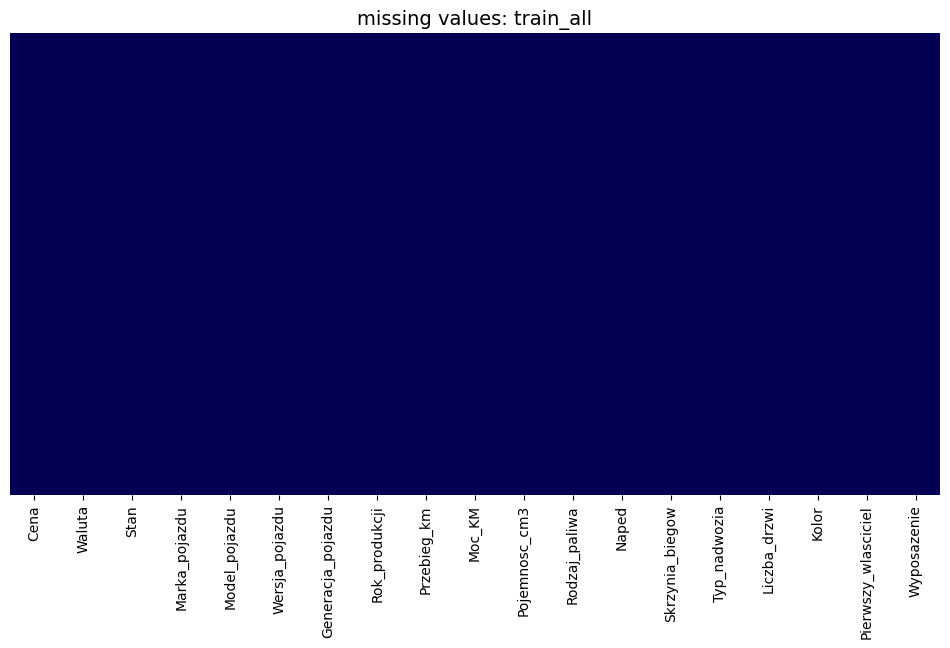

In [212]:
def plot_missing_values_heatmap(df, title):
    color_map = ListedColormap(['#040054', '#e0371d'])
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cmap=color_map, cbar=False, yticklabels=False)
    plt.title(f'missing values: {title}', fontsize=14)
    plt.show()

plot_missing_values_heatmap(train_all, "train_all")

categorical columns to show: Index(['Waluta', 'Stan', 'Marka_pojazdu', 'Rodzaj_paliwa', 'Naped',
       'Skrzynia_biegow', 'Typ_nadwozia', 'Kolor', 'Pierwszy_wlasciciel'],
      dtype='object')


Przetwarzanie kolumn kategorycznych:   0%|          | 0/9 [00:00<?]

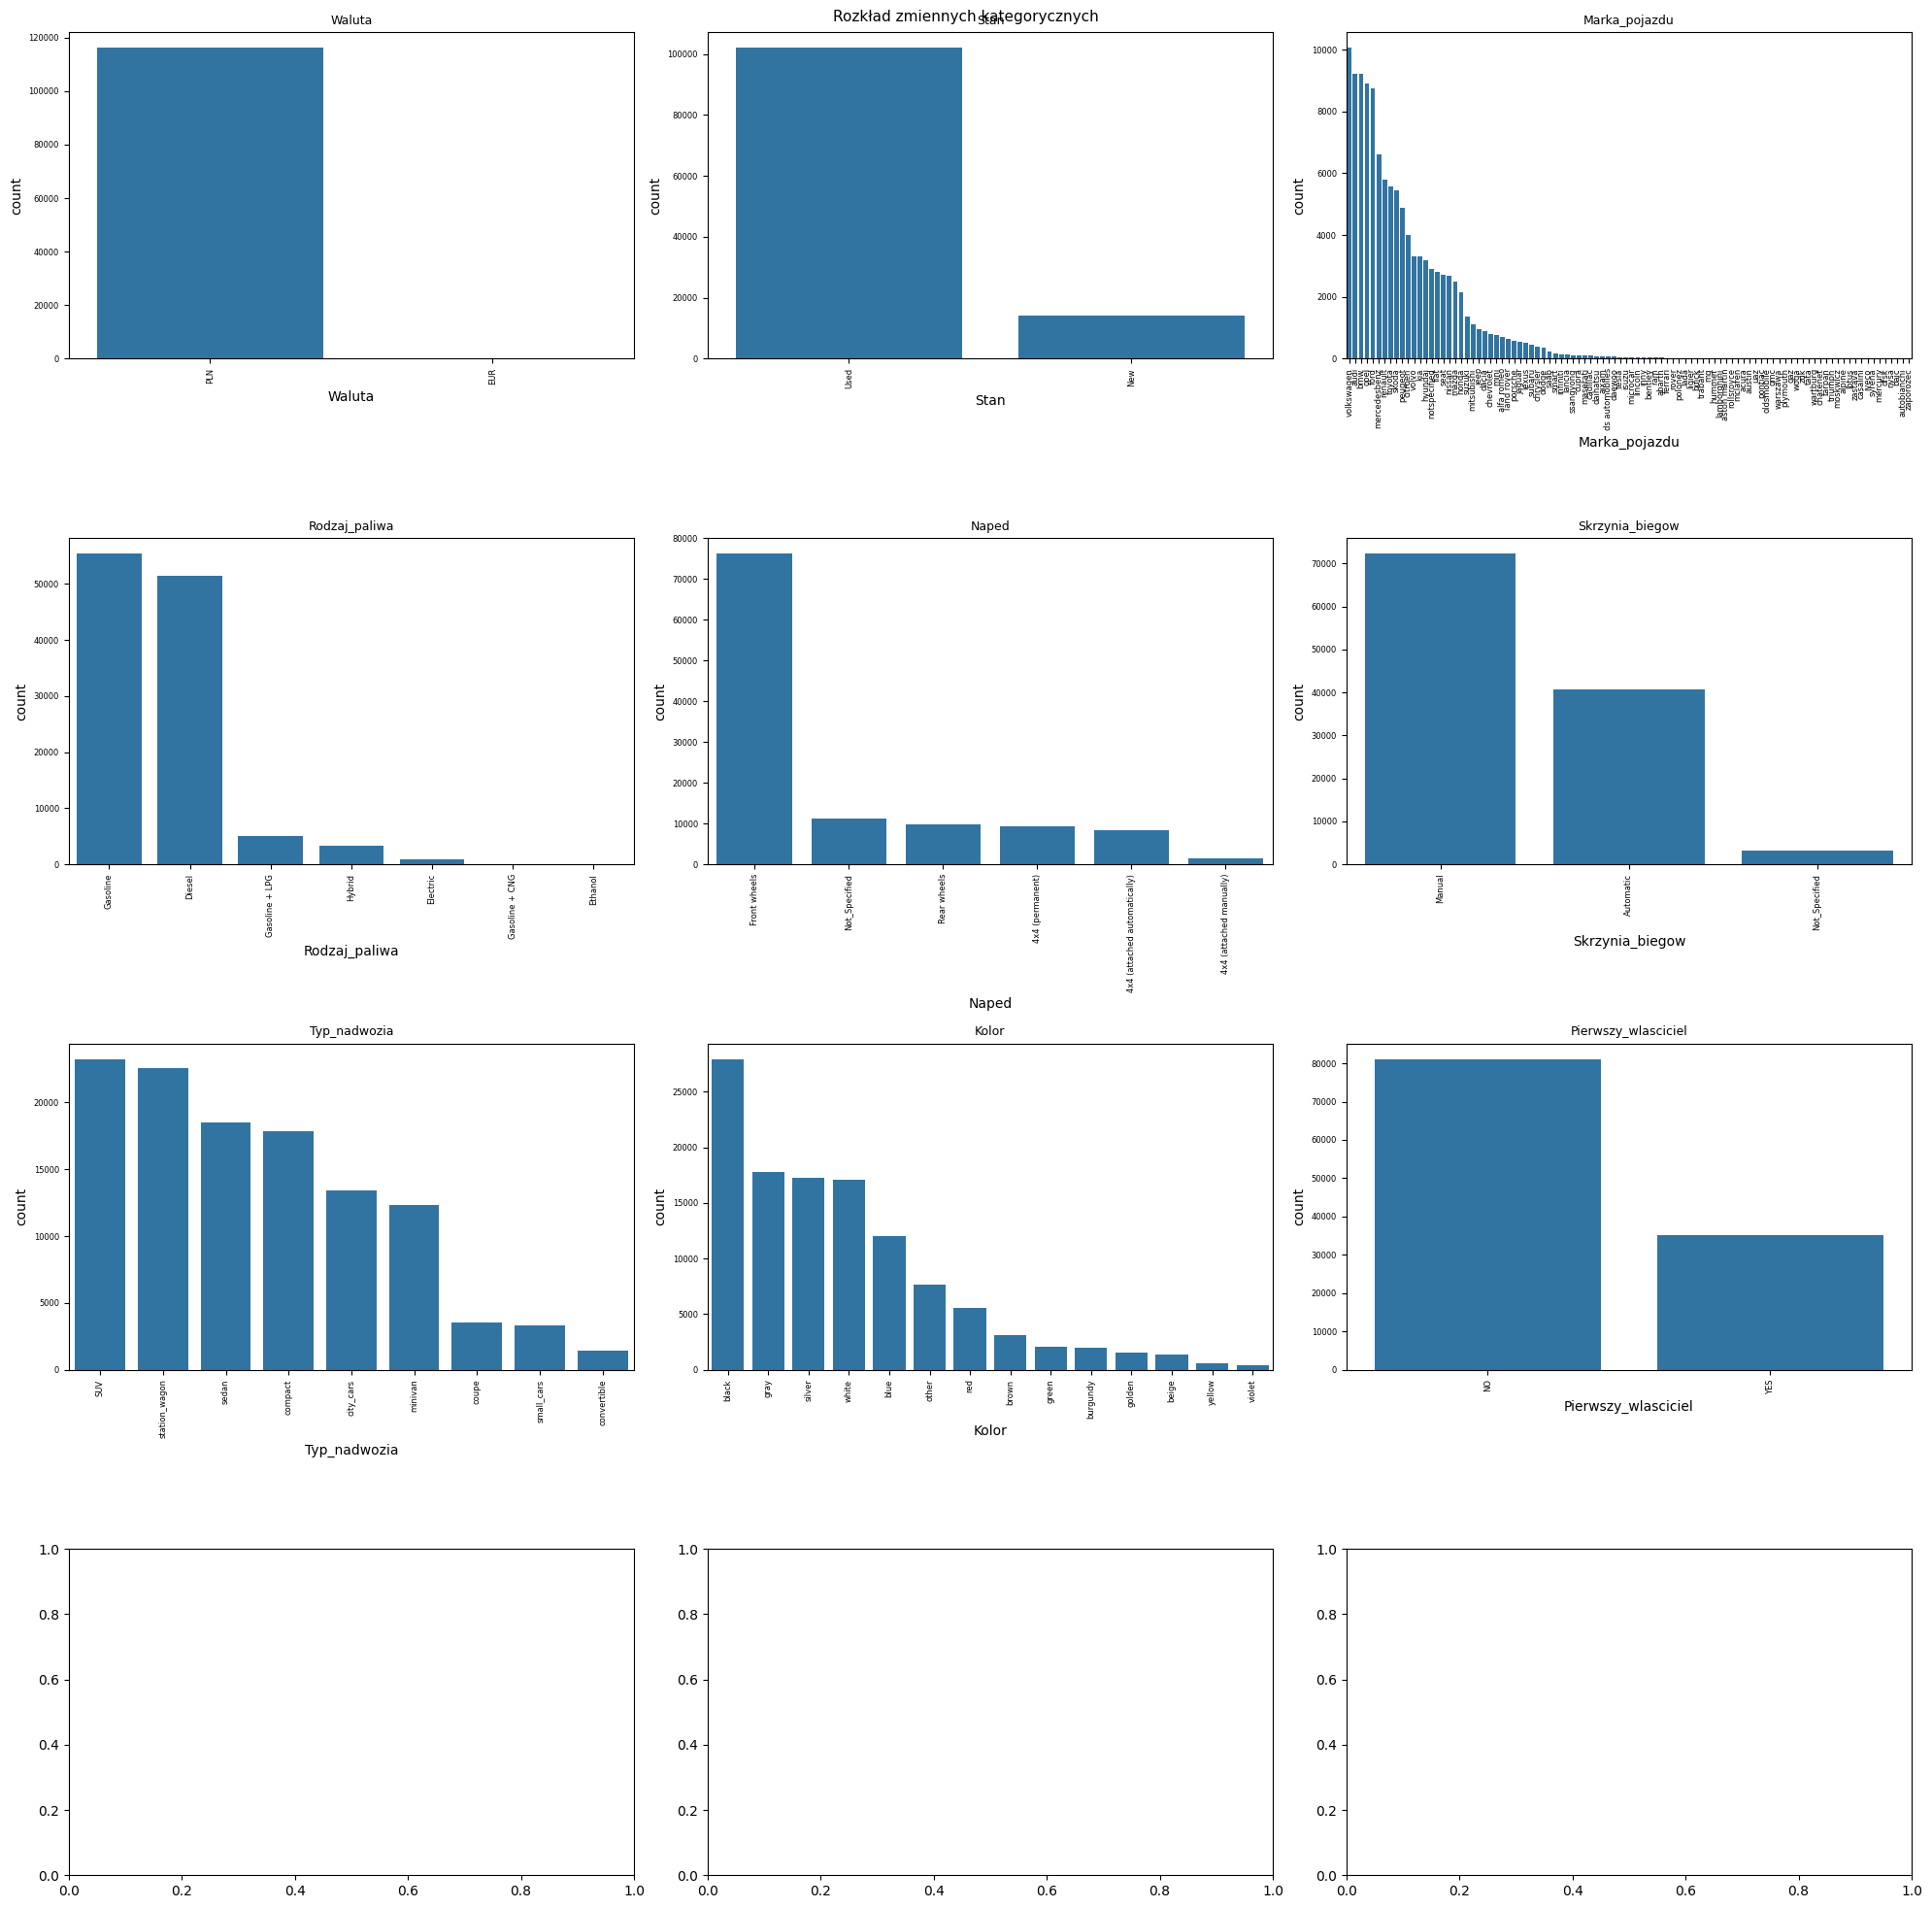

,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Kolor,Pierwszy_wlasciciel,Wyposazenie
count,116282,116282,116282,116282,116282,116282,116282,116282,116282,116282,116282,116282,116282
unique,2,2,96,1109,14693,548,7,6,3,9,14,2,98535
top,PLN,Used,volkswagen,astra,notspecified,notspecified,Gasoline,Front wheels,Manual,SUV,black,NO,[]
freq,116137,101995,10055,2859,41335,35737,55458,76280,72347,23254,27959,81145,7244


In [213]:
from tqdm.auto  import tqdm

def feature_distribution(df, to_drop=[
    'Wersja_pojazdu', 'Model_pojazdu',
    'Generacja_pojazdu',
    'Wyposazenie']):

    exploratory_df = df.copy()

    categorical_cols = exploratory_df.select_dtypes(include='object').columns
    exploratory_df[categorical_cols] = exploratory_df[categorical_cols].fillna('Not Specified')


    fig_cat, axes_cat = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
    axes_cat = axes_cat.flatten()

    categorical_cols_reduced = categorical_cols.drop(to_drop)
    print(f"categorical columns to show: {categorical_cols_reduced}")

    total = len(categorical_cols_reduced)
    pbar = tqdm(total=total, desc="Przetwarzanie kolumn kategorycznych",
                 unit="wiersz", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]')


    for i, column in enumerate(categorical_cols_reduced):
        pbar.set_description(f'Przetwarzanie kolumny: {column}')
        sns.countplot(x=exploratory_df[column], ax=axes_cat[i], order=exploratory_df[column].value_counts().index)
        axes_cat[i].set_title(column, fontsize=9)
        axes_cat[i].tick_params(axis='both', which='major', labelsize=6)
        axes_cat[i].tick_params(axis='x', rotation=90) 
        pbar.update(1)
    pbar.close()

    fig_cat.suptitle('Rozkład zmiennych kategorycznych', fontsize=11)
    plt.tight_layout()
    plt.show()

    display(df[categorical_cols].describe())


feature_distribution(train_all)

#### Wyposazenie
zamiana listy parametrów na kolumny typu bool

In [214]:
import ast
from tqdm.auto  import tqdm

def get_unique_features_list(df):
    df = df.copy()
    successful_conversions = 0
    problematic_conversions = 0
    unique_features = set()

    total = len(df)
    pbar = tqdm(total=total, desc="Wybieranie unikatowych cech",
                 unit="wiersz", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]')
    
    for idx, features_str in enumerate(df['Wyposazenie'].fillna('')):
        pbar.update(1)
        try:
            # Try to convert string to list
            if isinstance(features_str, str) and features_str:
                # Use ast.literal_eval which is safer than eval
                features_list = ast.literal_eval(features_str)
                if isinstance(features_list, list):
                    unique_features.update(features_list)
                    successful_conversions += 1
                else:
                    problematic_conversions += 1
            else:
                problematic_conversions += 1
        except:
            # If an error occurs, ignore this row
            problematic_conversions += 1
            continue
    pbar.close()
    
    unique_features = sorted(list(unique_features))

    print(f'problematic conversions: {problematic_conversions}')
    return unique_features



def add_feature_columns(df, feature_list):
    """
    Dodaje kolumny dla każdej cechy z feature_list i ustawia wartości True/False
    w zależności od tego, czy cecha występuje w kolumnie 'Wyposazenie'.
    
    Parameters:
    df (DataFrame): Wejściowy DataFrame
    feature_list (list): Lista unikalnych cech do dodania jako kolumny
    
    Returns:
    DataFrame: DataFrame z nowymi kolumnami boolowskimi dla każdej cechy
    """
    # Tworzenie kopii DataFrame aby uniknąć modyfikacji oryginału
    result_df = df.copy()
    
    # Inicjalizacja liczników statystyk
    successful_conversions = 0
    problematic_conversions = 0
    
    # Przygotowanie macierzy cech (szybsza alternatywa dla DataFrame)
    feature_matrix = np.zeros((len(df), len(feature_list)), dtype=int)
    
    # Tworzenie słownika mapującego cechy na indeksy kolumn dla szybkiego dostępu
    feature_to_idx = {feature: i for i, feature in enumerate(feature_list)}
    
    # Przetwarzanie każdego wiersza
    for idx, features_str in tqdm(enumerate(df['Wyposazenie'].fillna('')), 
                                 total=len(df), 
                                 desc="Przetwarzanie cech",
                                 unit="wiersz"):
        try:
            # Próba konwersji stringa na listę
            if isinstance(features_str, str) and features_str:
                features_list = ast.literal_eval(features_str)
                if isinstance(features_list, list):
                    # Dla każdej cechy w liście, ustaw True w odpowiedniej kolumnie
                    for feature in features_list:
                        if feature in feature_to_idx:
                            col_idx = feature_to_idx[feature]
                            feature_matrix[idx, col_idx] = 1
                    successful_conversions += 1
                else:
                    problematic_conversions += 1
            else:
                problematic_conversions += 1
        except:
            # Jeśli wystąpi błąd, ignoruj ten wiersz
            problematic_conversions += 1
            continue
    
    # Konwersja macierzy do DataFrame
    feature_df = pd.DataFrame(feature_matrix, index=df.index, columns=feature_list)
    
    # Łączenie oryginalnego DataFrame z nowymi kolumnami cech
    result_df = pd.concat([result_df, feature_df], axis=1)
    
    # Wyświetlanie statystyk
    print(f"Statystyki dodawania kolumn cech:")
    print(f"- Pomyślnie przetworzono: {successful_conversions} wierszy")
    print(f"- Problematyczne wiersze: {problematic_conversions}")
    print(f"- Łącznie przetworzono: {len(df)} wierszy")
    print(f"- Dodano {len(feature_list)} kolumn cech")
    
    return result_df

In [215]:
test_features = get_unique_features_list(test)
print(f'ilosć unikatowych cech dla zbioru testowego: {len(test_features)}')

Wybieranie unikatowych cech:   0%|          | 0/72907 [00:00<?]

problematic conversions: 0
ilosć unikatowych cech dla zbioru testowego: 70


In [216]:
test = add_feature_columns(test, test_features)
train_all = add_feature_columns(train_all, test_features)

test = test.drop(columns=['Wyposazenie'])
train_all = train_all.drop(columns=['Wyposazenie'])


Przetwarzanie cech:   0%|          | 0/72907 [00:00<?, ?wiersz/s]

Statystyki dodawania kolumn cech:
- Pomyślnie przetworzono: 72907 wierszy
- Problematyczne wiersze: 0
- Łącznie przetworzono: 72907 wierszy
- Dodano 70 kolumn cech


Przetwarzanie cech:   0%|          | 0/116282 [00:00<?, ?wiersz/s]

Statystyki dodawania kolumn cech:
- Pomyślnie przetworzono: 113511 wierszy
- Problematyczne wiersze: 2771
- Łącznie przetworzono: 116282 wierszy
- Dodano 70 kolumn cech


In [217]:
print(f'Zredukowano wielkość danych trenigowych z: {train_all_shape_at_start} na {train_all.shape}')
print(f'Zredukowano wielkość danych testowych z: {test_shape_at_start} na {test.shape}')
show_info(train_all)


Zredukowano wielkość danych trenigowych z: (135397, 24) na (116282, 88)
Zredukowano wielkość danych testowych z: (72907, 24) na (72907, 88)


,Column Name,Type,Missing Values,Missing Percentage,Unique Values
0,Cena,int64,0,0.00,10107
1,Waluta,object,0,0.00,2
2,Stan,object,0,0.00,2
3,Marka_pojazdu,object,0,0.00,96
4,Model_pojazdu,object,0,0.00,1109
...,...,...,...,...,...
83,Tinted windows,int32,0,0.00,2
84,Twilight sensor,int32,0,0.00,2
85,USB socket,int32,0,0.00,2
86,Velor upholstery,int32,0,0.00,2


#### 

In [218]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
print(train_all.columns)

train_all.head()

Index(['Cena', 'Waluta', 'Stan', 'Marka_pojazdu', 'Model_pojazdu',
       'Wersja_pojazdu', 'Generacja_pojazdu', 'Rok_produkcji', 'Przebieg_km',
       'Moc_KM', 'Pojemnosc_cm3', 'Rodzaj_paliwa', 'Naped', 'Skrzynia_biegow',
       'Typ_nadwozia', 'Liczba_drzwi', 'Kolor', 'Pierwszy_wlasciciel', 'ABS',
       'ASR (traction control)', 'AUX socket', 'Active cruise control',
       'Adjustable suspension', 'Aftermarket radio', 'Air curtains',
       'Airbag protecting the knees', 'Alarm', 'Alloy wheels',
       'Automatic air conditioning', 'Auxiliary heating', 'Blind spot sensor',
       'Bluetooth', 'CD', 'CD changer', 'Central locking', 'Cruise control',
       'DVD player', 'Daytime running lights', 'Drivers airbag',
       'Dual zone air conditioning', 'ESP(stabilization of the track)',
       'Electric front windows', 'Electric rear windows',
       'Electrically adjustable mirrors', 'Electrically adjustable seats',
       'Electrochromic rear view mirror', 'Electrochromic side mirro

,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Pierwszy_wlasciciel,ABS,ASR (traction control),AUX socket,Active cruise control,Adjustable suspension,Aftermarket radio,Air curtains,Airbag protecting the knees,Alarm,Alloy wheels,Automatic air conditioning,Auxiliary heating,Blind spot sensor,Bluetooth,CD,CD changer,Central locking,Cruise control,DVD player,Daytime running lights,Drivers airbag,Dual zone air conditioning,ESP(stabilization of the track),Electric front windows,Electric rear windows,Electrically adjustable mirrors,Electrically adjustable seats,Electrochromic rear view mirror,Electrochromic side mirrors,Factory radio,Fog lights,Four-zone air conditioning,Front parking sensors,Front side airbags,GPS navigation,HUD(head-up display),Heated front seats,Heated rear seats,Heated side mirrors,Heated windscreen,Hook,Immobilizer,Isofix,LED lights,Lane assistant,Leather upholstery,MP3,Manual air conditioning,Multifunction steering wheel,On-board computer,Panoramic roof,Parking assistant,Passengers airbag,Power steering,Rain sensor,Rear parking sensors,Rear side airbags,Rear view camera,Roof rails,SD socket,Shift paddles,Speed limiter,Start-Stop system,Sunroof,TV tuner,Tinted windows,Twilight sensor,USB socket,Velor upholstery,Xenon lights
0,13900,PLN,Used,renault,grand espace,gr 2.0t 16v expression,notspecified,"2,005.00","213,000.00",170.00,"1,998.00",Gasoline,Front wheels,Manual,minivan,5.00,blue,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,25900,PLN,Used,renault,megane,1.6 16v 110,iii 20082016,"2,010.00","117,089.00",110.00,"1,598.00",Gasoline,Front wheels,Manual,station_wagon,5.00,silver,NO,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,5999,PLN,Used,ford,focus,1.6 tdci fx silver silver x,mk2 20042011,"2,007.00","218,000.00",90.00,"1,560.00",Diesel,Front wheels,Manual,compact,5.00,blue,NO,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,126000,PLN,Used,bmw,x5,notspecified,f15 20132018,"2,014.00","168,000.00",258.00,"2,998.00",Diesel,4x4 (permanent),Automatic,SUV,4.00,other,NO,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,0
6,114880,PLN,Used,audi,a6,2.0 tdi ultra s tronic,c7 20112018,"2,016.00","144,626.00",190.00,"1,968.00",Diesel,Not_Specified,Automatic,sedan,4.00,black,YES,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1


In [219]:
display(train_all.tail(20))

,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Pierwszy_wlasciciel,ABS,ASR (traction control),AUX socket,Active cruise control,Adjustable suspension,Aftermarket radio,Air curtains,Airbag protecting the knees,Alarm,Alloy wheels,Automatic air conditioning,Auxiliary heating,Blind spot sensor,Bluetooth,CD,CD changer,Central locking,Cruise control,DVD player,Daytime running lights,Drivers airbag,Dual zone air conditioning,ESP(stabilization of the track),Electric front windows,Electric rear windows,Electrically adjustable mirrors,Electrically adjustable seats,Electrochromic rear view mirror,Electrochromic side mirrors,Factory radio,Fog lights,Four-zone air conditioning,Front parking sensors,Front side airbags,GPS navigation,HUD(head-up display),Heated front seats,Heated rear seats,Heated side mirrors,Heated windscreen,Hook,Immobilizer,Isofix,LED lights,Lane assistant,Leather upholstery,MP3,Manual air conditioning,Multifunction steering wheel,On-board computer,Panoramic roof,Parking assistant,Passengers airbag,Power steering,Rain sensor,Rear parking sensors,Rear side airbags,Rear view camera,Roof rails,SD socket,Shift paddles,Speed limiter,Start-Stop system,Sunroof,TV tuner,Tinted windows,Twilight sensor,USB socket,Velor upholstery,Xenon lights
135374,45900,PLN,Used,ford,mondeo,2.0 tdci ambiente,mk5 2014,"2,016.00","157,900.00",150.00,"1,997.00",Diesel,Front wheels,Manual,sedan,5.00,blue,YES,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
135375,70000,PLN,Used,volkswagen,passat,notspecified,b8 2014,"2,015.00","97,247.00",150.00,"1,968.00",Diesel,Front wheels,Automatic,station_wagon,5.00,brown,NO,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
135376,33700,PLN,Used,ford,focus,notspecified,mk3 2010,"2,015.00","132,000.00",149.00,"1,999.00",Gasoline,Front wheels,Automatic,sedan,4.00,white,YES,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0
135377,12950,PLN,Used,alfa romeo,159,1.9jtdm progression,notspecified,"2,007.00","188,000.00",120.00,"1,910.00",Diesel,Front wheels,Manual,station_wagon,4.00,black,NO,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
135378,3900,PLN,Used,ford,mondeo,notspecified,mk3 20002006,"2,004.00","357,000.00",115.00,"1,998.00",Diesel,Front wheels,Manual,station_wagon,5.00,violet,NO,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
135379,13900,PLN,Used,ford,smax,notspecified,i 20062015,"2,006.00","255,500.00",130.00,"1,997.00",Diesel,Front wheels,Manual,minivan,5.00,silver,NO,1,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0
135380,3000,PLN,Used,citroen,xsara,ii 1.6i exclusive,ii 20012004,"2,002.00","237,769.00",110.00,"1,587.00",Gasoline,Front wheels,Manual,compact,5.00,burgundy,NO,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135381,147900,PLN,Used,audi,q5,notspecified,fy 2017,"2,018.00","78,029.00",190.00,"1,968.00",Diesel,Not_Specified,Automatic,SUV,5.00,black,NO,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
135382,4199,PLN,Used,volkswagen,lt,notspecified,notspecified,"1,992.00","231,654.00",80.00,"2,400.00",Diesel,Rear wheels,Manual,minivan,3.00,burgundy,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Feature engeneering 

In [220]:
# Wiek pojazdu jest kluczowym czynnikiem wpływającym na cenę - starsze samochody są zwykle tańsze
train_all['Wiek_pojazdu'] = 2025 - train_all['Rok_produkcji']
test['Wiek_pojazdu'] = 2025 - test['Rok_produkcji']

# Przebieg roczny pozwala ocenić intensywność użytkowania - wysoki przebieg roczny sugeruje większe zużycie
train_all['Przebieg_roczny'] = train_all['Przebieg_km'] / np.maximum(train_all['Wiek_pojazdu'], 1)
test['Przebieg_roczny'] = test['Przebieg_km'] / np.maximum(test['Wiek_pojazdu'], 1)
    
# Stosunek mocy do pojemności jest wskaźnikiem wydajności silnika - wyższa wartość oznacza bardziej wydajny silnik
train_all['Moc_na_litr'] = train_all['Moc_KM'] / (train_all['Pojemnosc_cm3'] / 1000)
test['Moc_na_litr'] = test['Moc_KM'] / (test['Pojemnosc_cm3'] / 1000)

# Przebieg na jednostkę mocy może wskazywać na zużycie silnika - wyższa wartość sugeruje większe zużycie
train_all['Przebieg_na_moc'] = train_all['Przebieg_km'] / np.maximum(train_all['Moc_KM'], 1)
test['Przebieg_na_moc'] = test['Przebieg_km'] / np.maximum(test['Moc_KM'], 1)


# Połączenie marki i modelu tworzy bardziej specyficzną kategorię, co może poprawić dokładność modelu
train_all['Marka_Model'] = train_all['Marka_pojazdu'] + '_' + train_all['Model_pojazdu']
test['Marka_Model'] = test['Marka_pojazdu'] + '_' + test['Model_pojazdu']

# Połączenie marki i rodzaju paliwa może uchwycić specyficzne cechy cenowe (np. diesle niektórych marek są droższe)
train_all['Marka_Paliwo'] = train_all['Marka_pojazdu'] + '_' + train_all['Rodzaj_paliwa']
test['Marka_Paliwo'] = test['Marka_pojazdu'] + '_' + test['Rodzaj_paliwa']

# Popularność modelu może wpływać na cenę - popularne modele mogą mieć niższe ceny ze względu na większą dostępność
all_models = pd.concat([train_all['Model_pojazdu'], test['Model_pojazdu']])
model_counts = all_models.value_counts()
train_all['Popularnosc_modelu'] = train_all['Model_pojazdu'].map(model_counts)
test['Popularnosc_modelu'] = test['Model_pojazdu'].map(model_counts)


# Segmentacja rynkowa
# Segmentacja rynkowa pozwala modelowi uchwycić różnice cenowe między segmentami premium, standard i budget
premium_brands = ['audi', 'bmw', 'mercedes', 'mercedesbenz', 'lexus', 'jaguar', 'porsche', 'tesla']
budget_brands = ['dacia', 'fiat', 'skoda', 'hyundai', 'kia', 'suzuki', 'citroen']

train_all['Segment_rynkowy'] = 'standard'
test['Segment_rynkowy'] = 'standard'
train_all.loc[train_all['Marka_pojazdu'].isin(premium_brands), 'Segment_rynkowy'] = 'premium'
train_all.loc[train_all['Marka_pojazdu'].isin(budget_brands), 'Segment_rynkowy'] = 'budget'
test.loc[test['Marka_pojazdu'].isin(premium_brands), 'Segment_rynkowy'] = 'premium'
test.loc[test['Marka_pojazdu'].isin(budget_brands), 'Segment_rynkowy'] = 'budget'


# Cechy wyposażenia
# Całkowita liczba elementów wyposażenia jest dobrym wskaźnikiem ogólnego poziomu wyposażenia samochodu
equipment_columns = [
    'ABS', 'ASR (traction control)', 'AUX socket', 'Active cruise control',
    'Adjustable suspension', 'Aftermarket radio', 'Air curtains',
    'Airbag protecting the knees', 'Alarm', 'Alloy wheels',
    'Automatic air conditioning', 'Auxiliary heating', 'Blind spot sensor',
    'Bluetooth', 'CD', 'CD changer', 'Central locking', 'Cruise control',
    'DVD player', 'Daytime running lights', 'Drivers airbag',
    'Dual zone air conditioning', 'ESP(stabilization of the track)',
    'Electric front windows', 'Electric rear windows',
    'Electrically adjustable mirrors', 'Electrically adjustable seats',
    'Electrochromic rear view mirror', 'Electrochromic side mirrors',
    'Factory radio', 'Fog lights', 'Four-zone air conditioning',
    'Front parking sensors', 'Front side airbags', 'GPS navigation',
    'HUD(head-up display)', 'Heated front seats', 'Heated rear seats',
    'Heated side mirrors', 'Heated windscreen', 'Hook', 'Immobilizer',
    'Isofix', 'LED lights', 'Lane assistant', 'Leather upholstery',
    'MP3', 'Manual air conditioning', 'Multifunction steering wheel',
    'On-board computer', 'Panoramic roof', 'Parking assistant',
    'Passengers airbag', 'Power steering', 'Rain sensor',
    'Rear parking sensors', 'Rear side airbags', 'Rear view camera',
    'Roof rails', 'SD socket', 'Shift paddles', 'Speed limiter',
    'Start-Stop system', 'Sunroof', 'TV tuner', 'Tinted windows',
    'Twilight sensor', 'USB socket', 'Velor upholstery', 'Xenon lights'
]

# Sprawdzenie, które kolumny wyposażenia są dostępne w danych
available_equipment_test = [col for col in equipment_columns if col in test.columns]
test['Liczba_elementow_wyposazenia'] = test[available_equipment_test].sum(axis=1)

available_equipment_train = [col for col in equipment_columns if col in train_all.columns]
train_all['Liczba_elementow_wyposazenia'] = train_all[available_equipment_train].sum(axis=1)


# Wskaźnik premium skupia się na luksusowych elementach wyposażenia, które znacząco podnoszą wartość samochodu
premium_features = [
    'Leather upholstery', 'Panoramic roof', 'HUD(head-up display)', 
    'Four-zone air conditioning', 'Heated rear seats', 'TV tuner',
    'Electrically adjustable seats', 'Sunroof'
]

premium_available = [col for col in premium_features if col in train_all.columns and col in test.columns]
if premium_available:
    train_all['Wskaznik_premium'] = train_all[premium_available].sum(axis=1)
    test['Wskaznik_premium'] = test[premium_available].sum(axis=1)
else:
    train_all['Wskaznik_premium'] = 0
    test['Wskaznik_premium'] = 0



# Wskaźnik bezpieczeństwa
# Wskaźnik bezpieczeństwa agreguje elementy związane z bezpieczeństwem, które są ważne dla wielu kupujących
safety_features = [
    'ABS', 'ESP(stabilization of the track)', 'Airbag protecting the knees',
    'Front side airbags', 'Rear side airbags', 'Drivers airbag',
    'Passengers airbag', 'Lane assistant', 'Blind spot sensor'
]

safety_available_test = [col for col in safety_features if col in test.columns]
if safety_available_test: test['Wskaznik_bezpieczenstwa'] = test[safety_available_test].sum(axis=1)
else: test['Wskaznik_bezpieczenstwa'] = 0

safety_available_train = [col for col in safety_features if col in train_all.columns]
if safety_available_train: train_all['Wskaznik_bezpieczenstwa'] = train_all[safety_available_train].sum(axis=1)
else: train_all['Wskaznik_bezpieczenstwa'] = 0


# Wskaźnik komfortu
# Wskaźnik komfortu skupia się na elementach poprawiających wygodę użytkowania, co wpływa na wartość samochodu
comfort_features = [
    'Automatic air conditioning', 'Cruise control', 'Electric front windows',
    'Electric rear windows', 'Heated front seats', 'Heated side mirrors',
    'Multifunction steering wheel', 'Parking assistant', 'Rear parking sensors'
]
comfort_available_test = [col for col in comfort_features if col in test.columns]
if comfort_available_test: test['Wskaznik_komfortu'] = test[comfort_available_test].sum(axis=1)
else: test['Wskaznik_komfortu'] = 0

comfort_available_train = [col for col in comfort_features if col in train_all.columns]
if comfort_available_train: train_all['Wskaznik_komfortu'] = train_all[comfort_available_train].sum(axis=1)
else: train_all['Wskaznik_komfortu'] = 0


 # Wskaźnik technologii
 # Wskaźnik technologii agreguje nowoczesne rozwiązania technologiczne, które podnoszą wartość pojazdu
tech_features = [
    'Bluetooth', 'GPS navigation', 'USB socket', 'Active cruise control',
    'On-board computer', 'LED lights', 'Start-Stop system', 'Twilight sensor'
]

tech_available_test = [col for col in tech_features if col in test.columns]
if tech_available_test: test['Wskaznik_technologii'] = test[tech_available_test].sum(axis=1)
else: test['Wskaznik_technologii'] = 0

tech_available_train = [col for col in tech_features if col in train_all.columns]
if tech_available_train: train_all['Wskaznik_technologii'] = train_all[tech_available_train].sum(axis=1)
else: train_all['Wskaznik_technologii'] = 0
    

# Porównuje przebieg pojazdu z oczekiwanym przebiegiem dla jego wieku (zakładając średnio 15000 km rocznie)
test['Przebieg_vs_wiek_norm'] = test['Przebieg_km'] / (test['Wiek_pojazdu'] * 15000)
train_all['Przebieg_vs_wiek_norm'] = train_all['Przebieg_km'] / (train_all['Wiek_pojazdu'] * 15000)

# Logarytmiczna transformacja przebiegu pomaga uchwycić nieliniowy wpływ przebiegu na cenę
test['Log_przebieg'] = np.log1p(test['Przebieg_km'])
train_all['Log_przebieg'] = np.log1p(train_all['Przebieg_km'])

# Logarytmiczna transformacja mocy silnika - wpływ mocy na cenę często nie jest liniowy
test['Log_moc'] = np.log1p(test['Moc_KM'])
train_all['Log_moc'] = np.log1p(train_all['Moc_KM'])
    
# Logarytmiczna transformacja pojemności silnika - podobnie jak moc, wpływ na cenę często nie jest liniowy
test['Log_pojemnosc'] = np.log1p(test['Pojemnosc_cm3'])
train_all['Log_pojemnosc'] = np.log1p(train_all['Pojemnosc_cm3'])

# Przekształcenie kategorycznej cechy "Stan" na wartość numeryczną dla łatwiejszego wykorzystania przez model
test['Stan_numeryczny'] = test['Stan'].map({'New': 1, 'Used': 0})
train_all['Stan_numeryczny'] = train_all['Stan'].map({'New': 1, 'Used': 0})

# Przekształcenie informacji o pierwszym właścicielu na wartość numeryczną
test['Pierwszy_wlasciciel_numeryczny'] = test['Pierwszy_wlasciciel'].map({'YES': 1, 'NO': 0})
train_all['Pierwszy_wlasciciel_numeryczny'] = train_all['Pierwszy_wlasciciel'].map({'YES': 1, 'NO': 0})
    
# Stosunek mocy do pojemności jest ważnym wskaźnikiem wydajności silnika
test['Moc_Pojemnosc_ratio'] = test['Moc_KM'] / np.maximum(test['Pojemnosc_cm3'] / 1000, 0.1)
train_all['Moc_Pojemnosc_ratio'] = train_all['Moc_KM'] / np.maximum(train_all['Pojemnosc_cm3'] / 1000, 0.1)
    
# Pokazuje, jak dobrze wyposażony jest samochód w stosunku do jego wieku
test['Wyposazenie_na_wiek'] = test['Liczba_elementow_wyposazenia'] / np.maximum(test['Wiek_pojazdu'], 1)
train_all['Wyposazenie_na_wiek'] = train_all['Liczba_elementow_wyposazenia'] / np.maximum(train_all['Wiek_pojazdu'], 1)






# test['Kategoria_mocy'] = pd.cut(test['Moc_KM'], bins=[0, 100, 150, 200, 300, 1000], labels=['Bardzo słaby', 'Słaby', 'Średni', 'Mocny', 'Bardzo mocny'])
# train_all['Kategoria_mocy'] = pd.cut(train_all['Moc_KM'], bins=[0, 100, 150, 200, 300, 1000], labels=['Bardzo słaby', 'Słaby', 'Średni', 'Mocny', 'Bardzo mocny'])


In [221]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)

In [222]:
display(train_all.tail(20))

,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Pierwszy_wlasciciel,ABS,ASR (traction control),AUX socket,Active cruise control,Adjustable suspension,Aftermarket radio,Air curtains,Airbag protecting the knees,Alarm,Alloy wheels,Automatic air conditioning,Auxiliary heating,Blind spot sensor,Bluetooth,CD,CD changer,Central locking,Cruise control,DVD player,Daytime running lights,Drivers airbag,Dual zone air conditioning,ESP(stabilization of the track),Electric front windows,Electric rear windows,Electrically adjustable mirrors,Electrically adjustable seats,Electrochromic rear view mirror,Electrochromic side mirrors,Factory radio,Fog lights,Four-zone air conditioning,Front parking sensors,Front side airbags,GPS navigation,HUD(head-up display),Heated front seats,Heated rear seats,Heated side mirrors,Heated windscreen,Hook,Immobilizer,Isofix,LED lights,Lane assistant,Leather upholstery,MP3,Manual air conditioning,Multifunction steering wheel,On-board computer,Panoramic roof,Parking assistant,Passengers airbag,Power steering,Rain sensor,Rear parking sensors,Rear side airbags,Rear view camera,Roof rails,SD socket,Shift paddles,Speed limiter,Start-Stop system,Sunroof,TV tuner,Tinted windows,Twilight sensor,USB socket,Velor upholstery,Xenon lights,Wiek_pojazdu,Przebieg_roczny,Moc_na_litr,Przebieg_na_moc,Marka_Model,Marka_Paliwo,Popularnosc_modelu,Segment_rynkowy,Liczba_elementow_wyposazenia,Wskaznik_premium,Wskaznik_bezpieczenstwa,Wskaznik_komfortu,Wskaznik_technologii,Przebieg_vs_wiek_norm,Log_przebieg,Log_moc,Log_pojemnosc,Stan_numeryczny,Pierwszy_wlasciciel_numeryczny,Moc_Pojemnosc_ratio,Wyposazenie_na_wiek
135374,45900,PLN,Used,ford,mondeo,2.0 tdci ambiente,mk5 2014,"2,016.00","157,900.00",150.00,"1,997.00",Diesel,Front wheels,Manual,sedan,5.00,blue,YES,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,9.00,"17,544.44",75.11,"1,052.67",ford_mondeo,ford_Diesel,2744,standard,29,0,5,5,3,1.17,11.97,5.02,7.60,0,1,75.11,3.22
135375,70000,PLN,Used,volkswagen,passat,notspecified,b8 2014,"2,015.00","97,247.00",150.00,"1,968.00",Diesel,Front wheels,Automatic,station_wagon,5.00,brown,NO,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,10.00,"9,724.70",76.22,648.31,volkswagen_passat,volkswagen_Diesel,3646,standard,30,1,3,5,8,0.65,11.49,5.02,7.59,0,0,76.22,3.00
135376,33700,PLN,Used,ford,focus,notspecified,mk3 2010,"2,015.00","132,000.00",149.00,"1,999.00",Gasoline,Front wheels,Automatic,sedan,4.00,white,YES,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,10.00,"13,200.00",74.54,885.91,ford_focus,ford_Gasoline,3306,standard,30,0,6,5,4,0.88,11.79,5.01,7.60,0,1,74.54,3.00
135377,12950,PLN,Used,alfa romeo,159,1.9jtdm progression,notspecified,"2,007.00","188,000.00",120.00,"1,910.00",Diesel,Front wheels,Manual,station_wagon,4.00,black,NO,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,18.00,"10,444.44",62.83,"1,566.67",alfa romeo_159,alfa romeo_Diesel,271,standard,24,0,5,4,1,0.70,12.14,4.80,7.56,0,0,62.83,1.33
135378,3900,PLN,Used,ford,mondeo,notspecified,mk3 20002006,"2,004.00","357,000.00",115.00,"1,998.00",Diesel,Front wheels,Manual,station_wagon,5.00,violet,NO,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,21.00,"17,000.00",57.56,"3,104.35",ford_mondeo,ford_Diesel,2744,standard,21,2,3,3,1,1.13,12.79,4.75,7.60,0,0,57.56,1.00
135379,13900,PLN,Used,ford,smax,notspecified,i 20062015,"2,006.00","255,500.00",130.00,"1,997.00",Diesel,Front wheels,Manual,miniv

In [223]:
display(test.tail(20))

,ID,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Pierwszy_wlasciciel,ABS,ASR (traction control),AUX socket,Active cruise control,Adjustable suspension,Aftermarket radio,Air curtains,Airbag protecting the knees,Alarm,Alloy wheels,Automatic air conditioning,Auxiliary heating,Blind spot sensor,Bluetooth,CD,CD changer,Central locking,Cruise control,DVD player,Daytime running lights,Drivers airbag,Dual zone air conditioning,ESP(stabilization of the track),Electric front windows,Electric rear windows,Electrically adjustable mirrors,Electrically adjustable seats,Electrochromic rear view mirror,Electrochromic side mirrors,Factory radio,Fog lights,Four-zone air conditioning,Front parking sensors,Front side airbags,GPS navigation,HUD(head-up display),Heated front seats,Heated rear seats,Heated side mirrors,Heated windscreen,Hook,Immobilizer,Isofix,LED lights,Lane assistant,Leather upholstery,MP3,Manual air conditioning,Multifunction steering wheel,On-board computer,Panoramic roof,Parking assistant,Passengers airbag,Power steering,Rain sensor,Rear parking sensors,Rear side airbags,Rear view camera,Roof rails,SD socket,Shift paddles,Speed limiter,Start-Stop system,Sunroof,TV tuner,Tinted windows,Twilight sensor,USB socket,Velor upholstery,Xenon lights,Wiek_pojazdu,Przebieg_roczny,Moc_na_litr,Przebieg_na_moc,Marka_Model,Marka_Paliwo,Popularnosc_modelu,Segment_rynkowy,Liczba_elementow_wyposazenia,Wskaznik_premium,Wskaznik_bezpieczenstwa,Wskaznik_komfortu,Wskaznik_technologii,Przebieg_vs_wiek_norm,Log_przebieg,Log_moc,Log_pojemnosc,Stan_numeryczny,Pierwszy_wlasciciel_numeryczny,Moc_Pojemnosc_ratio,Wyposazenie_na_wiek
72887,72888,PLN,Used,bentley,continental gt,standard,notspecified,2004,"45,096.00",560.00,"5,998.00",Gasoline,4x4 (attached automatically),Automatic,coupe,2.00,other,NO,1,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,21,"2,147.43",93.36,80.53,bentley_continental gt,bentley_Gasoline,33,standard,32,2,4,8,4,0.14,10.72,6.33,8.70,0,0,93.36,1.52
72888,72889,PLN,Used,skoda,rapid,1.4 tsi elegance dsg,notspecified,2014,"96,200.00",122.00,"1,390.00",Gasoline,Front wheels,Automatic,sedan,5.00,silver,YES,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,11,"8,745.45",87.77,788.52,skoda_rapid,skoda_Gasoline,489,budget,31,0,4,8,4,0.58,11.47,4.81,7.24,0,1,87.77,2.82
72889,72890,PLN,Used,suzuki,swift,1.2 premium,v 20102017,2013,"141,000.00",94.00,"1,242.00",Gasoline,Front wheels,Manual,city_cars,3.00,golden,NO,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,12,"11,750.00",75.68,"1,500.00",suzuki_swift,suzuki_Gasoline,553,budget,27,1,4,6,3,0.78,11.86,4.55,7.13,0,0,75.68,2.25
72890,72891,PLN,Used,bmw,seria 5,530i xdrive sport line sport,g30g31 2017,2017,"107,000.00",252.00,"1,998.00",Gasoline,4x4 (permanent),Automatic,sedan,4.00,white,YES,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,8,"13,375.00",126.13,424.60,bmw_seria 5,bmw_Gasoline,3260,premium,40,0,6,7,7,0.89,11.58,5.53,7.60,0,1,126.13,5.00
72891,72892,PLN,Used,peugeot,5008,notspecified,i 20092017,2015,"185,400.00",150.00,"1,997.00",Diesel,Front wheels,Manual,minivan,5.00,silver,NO,1,1,1,0,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,10,"18,540.00",75.11,"1,236.00",peugeot_5008,peugeot_Diesel,553,standard,43,1,4,8,5,1.24,12.13,5.02,7.60,0,0,75.11,4.30
72892,72893,PLN,New,kia,ceed,1.5 tgdi m,iii 2018,2021,5.00,160.00,"1,482.00",Gasoline,Front wheels,Manual,compact,5.00,silver,NO,1,1,1,0,0,0,0,0,1,1,1,0,0,1

In [224]:
train_all.shape


(116282, 109)

#### Save

In [225]:
train_all.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

In [226]:
test[0:20].to_csv("test_example.csv", index=False)

#### Target encoding

In [227]:
import category_encoders as ce

def apply_target_encoding(train_df, test_df, categorical_columns, target_column):
    
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    encoder = ce.TargetEncoder(cols=categorical_columns)
    train_df[categorical_columns] = encoder.fit_transform(train_df[categorical_columns], train_df[target_column])
    test_df[categorical_columns] = encoder.transform(test_df[categorical_columns])

    return train_df, test_df


categorical_columns = test.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Znaleziono {len(categorical_columns)} kolumn kategorycznych: {categorical_columns}")

encoded_train, encoded_test = apply_target_encoding(train_all, test, categorical_columns, 'Cena')

display(encoded_test.head(3))

Znaleziono 15 kolumn kategorycznych: ['Waluta', 'Stan', 'Marka_pojazdu', 'Model_pojazdu', 'Wersja_pojazdu', 'Generacja_pojazdu', 'Rodzaj_paliwa', 'Naped', 'Skrzynia_biegow', 'Typ_nadwozia', 'Kolor', 'Pierwszy_wlasciciel', 'Marka_Model', 'Marka_Paliwo', 'Segment_rynkowy']


,ID,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Pierwszy_wlasciciel,ABS,ASR (traction control),AUX socket,Active cruise control,Adjustable suspension,Aftermarket radio,Air curtains,Airbag protecting the knees,Alarm,Alloy wheels,Automatic air conditioning,Auxiliary heating,Blind spot sensor,Bluetooth,CD,CD changer,Central locking,Cruise control,DVD player,Daytime running lights,Drivers airbag,Dual zone air conditioning,ESP(stabilization of the track),Electric front windows,Electric rear windows,Electrically adjustable mirrors,Electrically adjustable seats,Electrochromic rear view mirror,Electrochromic side mirrors,Factory radio,Fog lights,Four-zone air conditioning,Front parking sensors,Front side airbags,GPS navigation,HUD(head-up display),Heated front seats,Heated rear seats,Heated side mirrors,Heated windscreen,Hook,Immobilizer,Isofix,LED lights,Lane assistant,Leather upholstery,MP3,Manual air conditioning,Multifunction steering wheel,On-board computer,Panoramic roof,Parking assistant,Passengers airbag,Power steering,Rain sensor,Rear parking sensors,Rear side airbags,Rear view camera,Roof rails,SD socket,Shift paddles,Speed limiter,Start-Stop system,Sunroof,TV tuner,Tinted windows,Twilight sensor,USB socket,Velor upholstery,Xenon lights,Wiek_pojazdu,Przebieg_roczny,Moc_na_litr,Przebieg_na_moc,Marka_Model,Marka_Paliwo,Popularnosc_modelu,Segment_rynkowy,Liczba_elementow_wyposazenia,Wskaznik_premium,Wskaznik_bezpieczenstwa,Wskaznik_komfortu,Wskaznik_technologii,Przebieg_vs_wiek_norm,Log_przebieg,Log_moc,Log_pojemnosc,Stan_numeryczny,Pierwszy_wlasciciel_numeryczny,Moc_Pojemnosc_ratio,Wyposazenie_na_wiek
0,1,"63,097.32","162,984.00","113,859.63","190,717.65","91,215.42","82,519.89",2021,1.00,163.00,"1,950.00","57,951.40","158,743.80","116,379.08","108,817.53",5.00,"68,200.04","73,657.56",1,1,1,0,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,4,0.25,83.59,0.01,"190,168.14","102,612.67",355,"106,602.74",48,0,6,9,7,0.00,0.69,5.10,7.58,1,1,83.59,12.00
1,2,"63,097.32","49,091.50","47,363.97","40,505.57","15,827.31","22,740.89",2008,"202,585.00",145.00,"1,999.00","65,470.80","44,238.51","33,180.51","48,886.00",5.00,"46,918.21","58,506.80",1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,17,"11,916.76",72.54,"1,397.14","40,533.58","50,733.88",2744,"51,515.48",29,0,7,5,1,0.79,12.22,4.98,7.60,0,0,72.54,1.71
2,3,"63,097.32","49,091.50","101,118.08","79,992.92","69,370.16","26,297.08",2005,"373,000.00",218.00,"2,993.00","57,951.40","72,940.08","116,379.08","77,505.30",5.00,"74,225.45","58,506.80",1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,20,"18,650.00",72.84,"1,711.01","80,392.05","91,785.98",3260,"106,602.74",36,2,7,7,2,1.24,12.83,5.39,8.00,0,0,72.84,1.80


#### Dostosowanie typu do rozmiary zmiennej

In [228]:
def optimize_numerics(df):
    df = df.copy()
    start_mem = df.memory_usage().sum() / 1024**2  # Memory in MB
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics).columns:
        col_type = df[col].dtype
        min_val, max_val = df[col].min(), df[col].max()
        
        if str(col_type)[:3] == 'int':
            for dtype in [np.int8, np.int16, np.int32, np.int64]:
                if np.iinfo(dtype).min <= min_val <= max_val <= np.iinfo(dtype).max:
                    df[col] = df[col].astype(dtype)
                    break

        elif str(col_type)[:5] == 'float':
            for dtype in [np.float32, np.float64]:
                if np.finfo(dtype).min <= min_val <= max_val <= np.finfo(dtype).max:
                    df[col] = df[col].astype(dtype)
                    break

    end_mem = df.memory_usage().sum() / 1024**2  # Memory in MB
    print(f"Memory usage decreased from {start_mem:.2f} MB to {end_mem:.2f} MB "
          f"({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)")
    
    return df


encoded_train = optimize_numerics(encoded_train)
encoded_test = optimize_numerics(encoded_test)

Memory usage decreased from 66.54 MB to 23.40 MB (64.8% reduction)
Memory usage decreased from 41.16 MB to 13.77 MB (66.6% reduction)


#### Zapisz zakodowane dane

In [229]:
encoded_train.to_csv("encoded_train.csv", index=False)
encoded_test.to_csv("encoded_test.csv", index=False)

In [230]:
pd.set_option('display.max_colwidth', None)
display(show_info(train_all))

,Column Name,Type,Missing Values,Missing Percentage,Unique Values
0,Cena,int64,0,0.00,10107
1,Waluta,object,0,0.00,2
2,Stan,object,0,0.00,2
3,Marka_pojazdu,object,0,0.00,96
4,Model_pojazdu,object,0,0.00,1109
...,...,...,...,...,...
104,Log_pojemnosc,float64,0,0.00,978
105,Stan_numeryczny,int64,0,0.00,2
106,Pierwszy_wlasciciel_numeryczny,int64,0,0.00,2
107,Moc_Pojemnosc_ratio,float64,0,0.00,5810
